In [0]:
from fastai import *
from fastai.vision import *

In [0]:
def set_seed(seed=42):
    # python RNG
    import random
    random.seed(seed)

    # pytorch RNGs
    import torch
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

    # numpy RNG
    import numpy as np
    np.random.seed(seed)
    
set_seed()

In [0]:
def write_submission(preds, filename):
    sub = pd.read_csv('data/sample_submission_ns2btKE.csv')
    sub.category = preds
    sub.to_csv(filename, index=False)

In [0]:
f_score = FBeta(average='weighted', beta=1)

In [0]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
np.random.seed(42)
src = (ImageList.from_csv('data', 'train.csv', folder='images')
       .split_by_rand_pct(0.2, seed=42)
       .label_from_df(cols='category')
       .add_test(ImageList.from_csv('data/', csv_name='test_ApKoW4T.csv', folder='images'))
      )

## Training With Size 128

In [0]:
data = (src.transform(tfms, size=128, resize_method=ResizeMethod.SQUISH)
        .databunch().normalize(imagenet_stats))

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-03


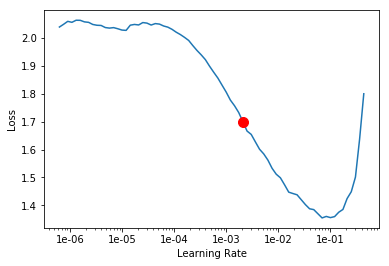

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(18, max_lr=slice(2e-3))

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,1.161818,0.766736,0.272000,0.721810,00:19
1,0.864874,0.640365,0.243200,0.752621,00:18
2,0.679338,0.570596,0.206400,0.790071,00:17
3,0.587189,0.481978,0.184000,0.813858,00:17
4,0.506771,0.467759,0.173600,0.821292,00:19
5,0.441403,0.418548,0.162400,0.836987,00:17
6,0.369249,0.405552,0.145600,0.854594,00:17
7,0.351321,0.397857,0.152000,0.847177,00:17
8,0.286855,0.377045,0.131200,0.868105,00:18
9,0.262540,0.361483,0.136800,0.862158,00:18


In [0]:
learn.save('Res50_128_877547')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06


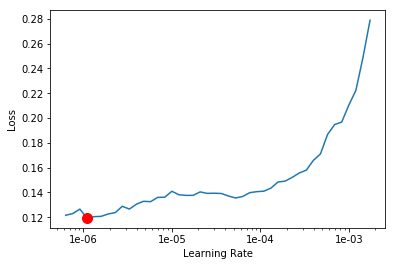

In [0]:
learn.unfreeze()
learn.clip_grad()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.load('Res34_128_862168');
learn.unfreeze();
learn.clip_grad();

In [0]:
lr = [2e-3/1000, 2e-3/100, 2e-3/100]

In [0]:
learn.fit_one_cycle(24, lr)

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,0.135267,0.337586,0.121600,0.878115,00:24
1,0.134537,0.329398,0.126400,0.873305,00:23
2,0.124365,0.319405,0.113600,0.886449,00:24
3,0.121675,0.304713,0.106400,0.893495,00:24
4,0.108551,0.306889,0.112000,0.887798,00:23
5,0.091137,0.301017,0.101600,0.898209,00:23
6,0.074224,0.310520,0.101600,0.898382,00:24
7,0.062111,0.309880,0.100800,0.899323,00:23
8,0.049269,0.304701,0.100800,0.899174,00:23
9,0.040387,0.305732,0.093600,0.906275,00:24


In [0]:
learn.save('s2_Res50_128_920846')

## Training with Size 256

In [0]:
data_256 = (src.transform(tfms, size=256, resize_method=ResizeMethod.SQUISH)
            .databunch()
            .normalize(imagenet_stats))

In [0]:
learn.data = data_256

In [0]:
learn.freeze();
learn.clip_grad();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07


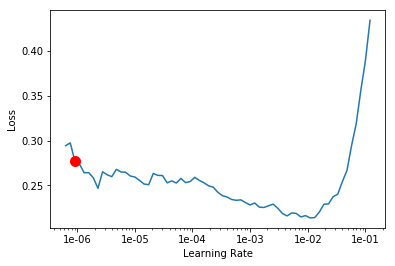

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(16, slice(1e-4))

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,0.235807,0.394416,0.112000,0.888106,00:56
1,0.225214,0.382139,0.108000,0.891752,00:54
2,0.200634,0.356438,0.100800,0.899363,00:54
3,0.189586,0.339507,0.100000,0.900009,00:55
4,0.176775,0.314939,0.096000,0.903945,00:54
5,0.180184,0.294531,0.091200,0.908426,00:54
6,0.155939,0.286191,0.092800,0.906873,00:54
7,0.137322,0.274569,0.089600,0.910545,00:54
8,0.135025,0.263795,0.087200,0.912825,00:54
9,0.118665,0.260747,0.087200,0.913069,00:54


In [0]:
learn.save('Res50_128to224_918433')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


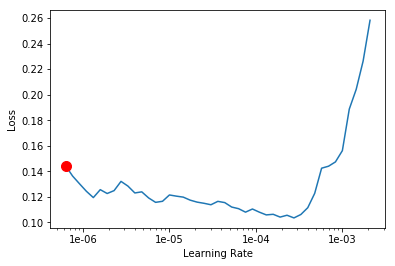

In [0]:
learn.unfreeze()
learn.clip_grad()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
lr = [1e-3/1000, 1e-3/100, 1e-3/100]
learn.fit_one_cycle(32, lr)

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,0.113888,0.251722,0.083200,0.917174,01:13
1,0.107678,0.243732,0.084800,0.915250,01:12
2,0.097923,0.230999,0.080000,0.920201,01:13
3,0.092969,0.222876,0.076000,0.924146,01:12
4,0.071634,0.205767,0.068800,0.931199,01:12
5,0.060520,0.193709,0.065600,0.934445,01:12
6,0.050068,0.197155,0.060000,0.939721,01:12
7,0.037427,0.191329,0.057600,0.942378,01:12
8,0.029954,0.185044,0.056800,0.943431,01:13
9,0.028350,0.181051,0.055200,0.944922,01:13


In [0]:
learn.save('s2_Res50_128to256_955245')

In [0]:
lr = [2e-3/1000, 2e-3/100, 2e-3/100]
learn.fit_one_cycle(12, lr)

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,0.001455,0.185611,0.044800,0.955195,01:13
1,0.000961,0.190947,0.043200,0.956866,01:13
2,0.002057,0.206501,0.040000,0.960093,01:13
3,0.004629,0.225442,0.046400,0.953692,01:12
4,0.006945,0.213679,0.044000,0.956062,01:12
5,0.003239,0.223394,0.044000,0.956085,01:12
6,0.002326,0.229323,0.043200,0.956987,01:13
7,0.003484,0.210361,0.040800,0.959092,01:12
8,0.001639,0.215162,0.036000,0.963980,01:12
9,0.001685,0.211433,0.036000,0.964078,01:12


In [0]:
learn.save('s2_Res50_128to256_963999')

In [0]:
preds, _ = learn.get_preds(DatasetType.Test)
pred_class = torch.argmax(preds, dim=1)
pred_class += 1
pred_numpy = pred_class.numpy()

In [0]:
write_submission(pred_numpy, 'FAI_Res50_128to246_963999.csv')
#LB 0.9728709421

## Training with Size 299

In [0]:
data_299 = (src.transform(tfms, size=299, resize_method=ResizeMethod.SQUISH)
            .databunch(bs=24)
            .normalize(imagenet_stats))

In [0]:
learn = cnn_learner(data_299, models.resnet50, metrics=[error_rate, f_score])

In [0]:
learn.load('s2_Res50_128to256_963999');
learn.freeze();
learn.clip_grad();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07


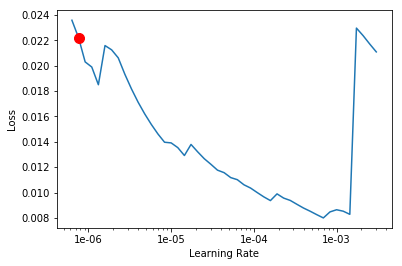

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
lr = 1e-3
lrs = [lr/9, lr/3, lr]

In [0]:
learn.fit_one_cycle(32, slice(3e-4))

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,0.025667,0.206577,0.046400,0.953604,01:27
1,0.017345,0.213024,0.045600,0.954456,01:26
2,0.011777,0.208933,0.046400,0.953717,01:28
3,0.015972,0.215782,0.048000,0.952036,01:27
4,0.021094,0.228127,0.044800,0.955296,01:26
5,0.016081,0.246221,0.044800,0.955447,01:26
6,0.025471,0.243374,0.048000,0.952246,01:27
7,0.014863,0.257133,0.047200,0.952855,01:26
8,0.012427,0.259374,0.043200,0.956947,01:27
9,0.011441,0.273805,0.047200,0.952891,01:27


In [0]:
learn.unfreeze()
learn.clip_grad();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


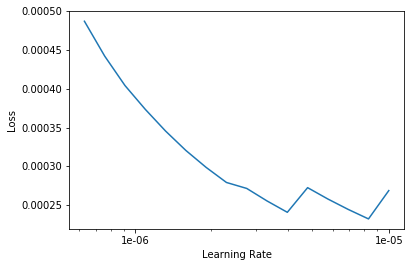

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 4e-4
lrs = [lr/100, lr/20, lr/5]

In [0]:
learn.fit_one_cycle(32, lrs)

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,0.003526,0.318683,0.040000,0.959982,02:03
1,0.005021,0.327624,0.046400,0.953807,02:03
2,0.011597,0.395443,0.047200,0.952585,02:03
3,0.020771,0.333545,0.040800,0.959174,02:04
4,0.014372,0.350398,0.044800,0.955408,02:04
5,0.011309,0.361765,0.048000,0.952423,02:03
6,0.038362,0.343047,0.045600,0.954636,02:03
7,0.049046,0.375772,0.047200,0.952783,02:03
8,0.020377,0.318941,0.040000,0.960068,02:04
9,0.043044,0.370518,0.040000,0.959832,02:03


In [0]:
learn.save('ResNet50_299_964777')

In [0]:
learn.load('ResNet50_299_964777');

In [0]:
preds, _ = learn.get_preds(DatasetType.Test)
pred_class = torch.argmax(preds, dim=1)
pred_class += 1
pred_class = pred_class.numpy()

In [0]:
write_submission(pred_class, 'ResNet50_124t256t299_964777.csv')
#LB 0.9812763721

## Getting predicted probabilties for Test Set

In [0]:
learn.load('ResNet50_299_964777');

In [0]:
class_name = ['Cargo', 'Military','Carrier' ,'Cruise','Tankers']

In [0]:
predsTTA, _ = learn.TTA(ds_type=DatasetType.Test)
preds, _ = learn.get_preds(DatasetType.Test)

predTTA_df = pd.DataFrame(predsTTA.numpy(), columns=class_name)
preds_df = pd.DataFrame(preds.numpy(), columns=class_name)

preds_df.to_csv('Preds_ResNet50_LB_98127.csv', index=False)
predTTA_df.to_csv('TTA_ResNet50_LB_98127.csv', index=False)

In [0]:
!head ResNet50_LB_98127.csv